# Linear Regression using Gradient descent 

# Importing Dependencies

We will be needing the following modules for our code.
     * numpy - numerical computational lib 
     * pandas - we will be using it only to import out dataset
     * matplotlib - for plotting graphs

In [2]:
#!pip3 install numpy
#!pip3 install matplotlib
#!pip3 install pandas

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import sklearn 

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


### Importing the dataset

In [4]:
df=pd.read_csv('/home/ashwin/Desktop/Datasets/gradDesc_data.csv')
#Check if the path above actually contains your dataset in case of error

In [5]:
#we will be converting our pandas dataframe to a numpy array, np.arrays are more efficient.
points=np.array(df)

## Lets plot out these point 

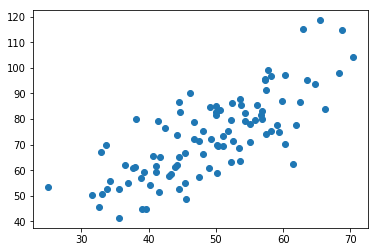

In [6]:
#Data Visualization
plt.scatter(points[:,0],points[:,1])
plt.show()

### What we need to do?
   We need to find a line of best fit so that we can make accurate prediction when new un-seen data is given to the model.

## The Error(Cost) Function

 This is the function we shall try to minimize to as to have the minimum error in our model.
 We will be using <b>Mean Squared Error</b> as the error function.

In [7]:
#Defining out error function
def err_fn(m,b,points):
    err_val=0
    for i in range(len(points)):
        #Mean squared error
        err_val+= ( points[i,1] - ((m*points[i,0]) + b ) ) ** 2
        #Error = actual_y - pred_y {i.e :- pred_y = mx +b}
   
    return err_val/float(len(points))

## Optimization using Gradient Descent

   The way we shall be minimizing the error function using Gradient Descent.

In [8]:
#Calculating Gradients
def calc_gradient(m,b,points,learn_rate):
    m_gradient=0
    b_gradient=0
    N=float(len(points))
    
    #Looping through all points
    for i in range(len(points)):
        #Calculating Gradient for one set of (x,y)
        #Here x =points[i,0] and y=points[i,1]  
        
        #Partial Derivative of Err Fn wrt m
        m_gradient+=(2/(N))*( points[i,1] - ((m*points[i,0]) + b) ) * (-points[i,0])
        
        #Partial Derivative of Err Fn wrt b
        b_gradient+=(2/N)*( points[i,1] - ((m*points[i,0]) + b) ) * (-1)
    
    #Updation rule
    updated_m= m - (learn_rate * m_gradient)
    updated_b= b - (learn_rate * b_gradient)


    return [updated_m,updated_b]

In [9]:
#Gradient Descent Driver Function
def gradient_run(m,b,points,no_of_iters,learn_rate) :
    
    for i in range(no_of_iters):

        [m,b]=calc_gradient(m,b,points,learn_rate)
        
    return [m,b]

In [10]:

print("Error before :",err_fn(0,0,points))

Error before : 5611.166153823905


In [11]:
m,b=gradient_run(0,0,points,100,0.0001)
print("Optimal Slope value -> m = ",m)
print("Optimal Intercept value -> b = ",b)


Optimal Slope value -> m =  1.4809270431914332
Optimal Intercept value -> b =  0.036308009119180855


In [12]:
print("Error after :",err_fn(m,b,points))


Error after : 111.05814972975426


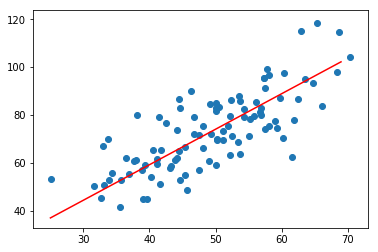

In [13]:
#Helper funtion to plot the line with the optimal m,b values after GD

def plot_line(y,x_datapoints):
    x=[x for x in range(int(min(x_datapoints)),int(max(x_datapoints)))]
    y=[abs(y(curr_x)) for curr_x in x ]
    plt.plot(x,y,'r')
    plt.scatter(points[:,0],points[:,1])
    plt.show()
    
y=lambda x: m*x + b

plot_line(y,points[:,0])

## Using SkLearn

In [14]:
from sklearn.linear_model import LinearRegression


/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [15]:
X=[[x] for x in points[:,0]]
y=[[y] for y in points[:,1]]

In [16]:
lreg_model=LinearRegression()

In [17]:
lreg_model.fit(X,y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [18]:
lreg_model.coef_

array([[1.28735737]])

## Making Predictions

In [19]:
from sklearn.cross_validation import train_test_split

/home/ashwin/.local/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)


In [21]:
lreg_model.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [22]:
predictions=lreg_model.predict(X_test)

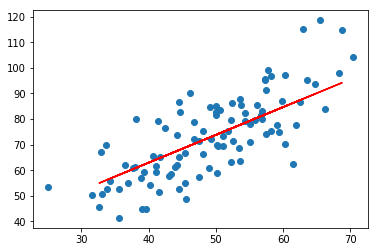

In [25]:
plt.scatter(X,y)
plt.plot(X_test,predictions,'r')


plt.show()
